In [8]:
import netCDF4 as nc
# ds=xr.Dataset({'qv':qv_a,'press':press_a,'envNodes':envNodes_a,'airTemp':airTemp_a,'skTemp':skTemp_a,'binNodes':binNodes_a,'pwc':pwc_a,'sfcEmiss':sfcEmiss_a,'dm':dm_a,'cldw':cldw_a,'sfcBin':sfcBin_a,'zCorrected':zCorrected_a,'pType':pType_a,'lon':lon_a,'lat':lat_a,'sfcType':sfcType_a,'tc':tc_a})

def read_subset(fname):
    with nc.Dataset(fname) as ds:
        qv=ds['qv'][:]
        press=ds['press'][:]
        envNodes=ds['envNodes'][:]
        airTemp=ds['airTemp'][:]
        skTemp=ds['skTemp'][:]
        binNodes=ds['binNodes'][:]
        pwc=ds['pwc'][:]
        sfcEmiss=ds['sfcEmiss'][:]
        dm=ds['dm'][:]
        cldw=ds['cldw'][:]
        sfcBin=ds['sfcBin'][:]
        zCorrected=ds['zCorrected'][:]
        pType=ds['pType'][:]
        lon=ds['lon'][:]
        lat=ds['lat'][:]
        sfcType=ds['sfcType'][:]
        tc=ds['tc'][:]
        tb_sim=ds['simTb'][:]
        scan=ds['scan'][:]
        pRate=ds['pRate'][:]
    return qv,press,envNodes,airTemp,skTemp,binNodes,pwc,sfcEmiss,dm,cldw,sfcBin,zCorrected,pType,lon,lat,sfcType,tc,tb_sim,scan,pRate

import glob

fnames=sorted(glob.glob('subsets/*.nc'))

import numpy as np
nprofs=0
tb_obsL=[]
tb_obsL_m1=[]
tb_obsL_p1=[]
tb_simL=[]
dbinL=[]
dmL=[]
pwcL=[]
pRateL=[]
bin_zdL=[]
pTypeL=[]
zCorrectedL=[]
for f in fnames:
    qv,press,envNodes,airTemp,skTemp,binNodes,pwc,\
        sfcEmiss,dm,cldw,sfcBin,zCorrected,pType,lon,lat,sfcType,tc,tb_sim,scan,pRate=read_subset(f)
    a=np.nonzero(binNodes[:,2]<76)
    dbinL.extend(binNodes[a[0],4]-binNodes[a[0],2])
    for i1 in a[0]:
        if pType[i1]>2:
            continue
        if binNodes[i1,0]>binNodes[i1,2]:
            continue
        if binNodes[i1,4]-binNodes[i1,2]>11:
            n1=int(binNodes[i1,2]-53)
            n2=int(binNodes[i1,2]+11)
            pwcL.append(pwc[i1,n1:n2])
            dmL.append(dm[i1,n1:n2])
            pRateL.append(pRate[i1,n1:n2])
            zCorrectedL.append(zCorrected[i1,n1:n2,0])
            bin_zdL.append(binNodes[i1,2])
            pTypeL.append(pType[i1])
    tb_simL.extend(tb_sim[a[0],6])
    am1=scan[a]-1
    am1[am1<0]=0
    ap1=scan[a]+1
    ap1[ap1>len(tc)-1]=len(tc)-1
    tb_obsL.extend(tc[scan[a],6])
    tb_obsL_m1.extend(tc[am1,6])
    tb_obsL_p1.extend(tc[ap1,6])
    nprofs+=len(a[0])
    #if nprofs>10:
    #    break

4468
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.11907385e-02
 1.77117530e-02 3.02458871e-02 4.61110100e-02 5.68149388e-02
 1.01110332e-01 1.36179671e-01 1.93084687e-01 2.52437830e-01
 3.14361751e-01 3.90515298e-01 4.74949032e-01 5.76092362e-01
 7.11128116e-01 8.34702373e-01 1.01525664e+00 1.27130723e+00
 1.58992386e+00 1.92513585e+00 2.27847028e+00 2.66920137e+00
 3.09806228e+00 3.62023973e+00 4.15753889e+00 4.66160250e+00
 5.19158268e+00 5.57975912e+00 5.99966049e+00 6.50606012e+00
 7.00692368e+00 7.52451658e+00 8.25659084e+00 8.97976017e+00
 9.82250214e+00 1.07076664e+01 1.17519655e+01 1.27279072e+01
 1.36358786e+01 1.44862413e+01 1.54272242e+01 1.63788357e+01
 1.74468670e+01 1.85587883e+01 1.97203827e+01 2.11077309e+01
 2.35834045e+01 2.65095367e+01 2.66582012e+01 2.64233627e+01
 2.65717983e+01 2.66789684e+01 2.67566681e+01 2.67394409e+01
 2.67458286e+01 2.65372009e+01 2.62504883e+01 2.59455891e+01]


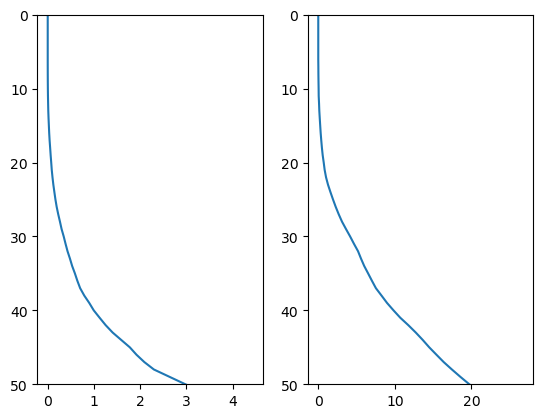

In [9]:
import matplotlib.pyplot as plt
pwcL=np.array(pwcL)
pRateL=np.array(pRateL)
dmL=np.array(dmL)
zCorrectedL=np.array(zCorrectedL)
plt.subplot(121)
plt.plot(pRateL.mean(axis=0),range(64))
plt.ylim(50,0)
print(len(pwcL))
plt.subplot(122)
zCorrectedL[zCorrectedL<0]=0
zCorrectedL[zCorrectedL!=zCorrectedL]=0
dmL[dmL!=dmL]=0
plt.plot(zCorrectedL.mean(axis=0),range(64))
print(zCorrectedL.mean(axis=0))
plt.ylim(50,0)
nx,nz=zCorrectedL.shape
zcfad=np.zeros((40,nz))
for i in range(nx):
    for j in range(nz):
        iz=int(zCorrectedL[i,j]-10)
        if iz>=0 and iz<40:
            zcfad[int(iz),j]+=1


(63.0, 0.0)

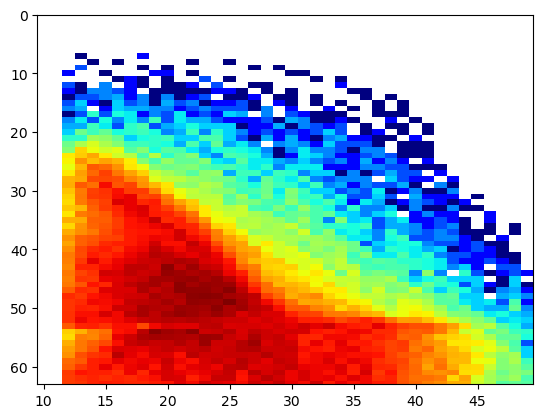

In [177]:
import matplotlib.pyplot as plt
import matplotlib.colors as c
plt.figure()
plt.pcolormesh(np.arange(40)+10,np.arange(64),zcfad.T,cmap='jet',norm=c.LogNorm())
plt.ylim(63,0)

[7, 7, 7, 7, 7, 8, 7, 7, 7, 7, 8, 9, 7, 7, 7, 8, 8, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 8, 8, 8, 8, 8, 9, 7, 7, 7, 8, 8, 8, 10, 9, 10, 10, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 13, 13, 13, 13, 13, 12, 12, 13, 13, 13, 13, 13, 13, 13, 12, 12, 13, 12, 12, 13, 13, 12, 12, 13, 11, 11, 11, 13, 12, 12, 13, 13, 13, 13, 13, 13, 12, 11, 11, 12, 12, 11, 11, 12, 12, 13, 12, 12, 12, 13, 13, 12, 9, 10, 9, 8, 8, 7, 8, 9, 10, 9, 2, 3, 3, 15, 15, 14, 15, 15, 15, 15, 14, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 9, 9, 9, 8, 8, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 7, 7, 8, 8, 8, 8, 8, 8, 8, 7, 8, 9, 7, 9, 13, 13, 13, 13, 13, 13, 12, 14, 14, 14, 14, 5, 6, 6, 7, 8, 7, 9, 8, 8, 8, 8, 8, 6, 6, 8, 9, 8, 8, 9, 9, 10, 10, 10, 10, 9, 9, 9, 9, 10, 10, 10, 9, 9, 9, 9, 10, 10, 11, 11, 12, 12, 12, 11, 11, 12, 12, 12, 12, 12, 12, 12, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12

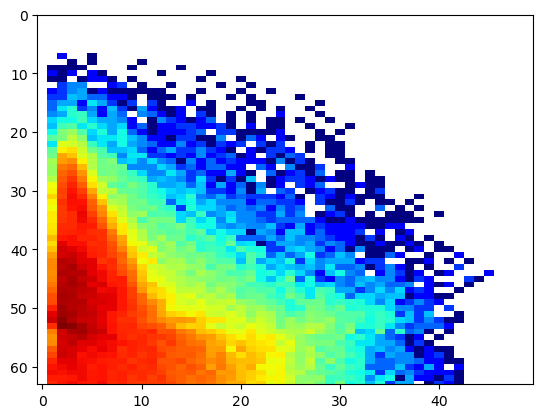

In [10]:
#h1=plt.hist(dbinL,bins=10)
print(dbinL)
dbinL=np.array(dbinL)
n1=np.nonzero(dbinL>11) 
print(len(n1[0]))
from sklearn.cluster import KMeans
import matplotlib.colors as c
nc=30
kmeans=KMeans(n_clusters=nc)
kmeans.fit(pRateL)
#for i in range(nc):
#    plt.plot(np.log10(1+kmeans.cluster_centers_[i]),range(51))
#plt.ylim(50,0)
cfad_pRate=np.zeros((50,64))
for pRate1 in pRateL:
    for k in range(64):
        iz=int(20*np.log10(1+pRate1[k]))
        if iz>0 and iz<50:
          cfad_pRate[iz,k]+=1

plt.figure()
plt.pcolormesh(np.arange(50),np.arange(64),cfad_pRate.T,cmap='jet',norm=c.LogNorm())
plt.ylim(63,0)

pRateL=np.array(pRateL)
dmL=np.array(dmL)
pRateL_log = np.log10(1 + pRateL)
pRateL_mean=pRateL_log.mean(axis=0)
pRateL_std=pRateL_log.std(axis=0)
pRateL_log_norm = (pRateL_log - pRateL_mean)/(pRateL_std+1e-3)
dmL_log = np.log10(1 + 30*dmL)
dmL_mean=dmL_log.mean(axis=0)
dmL_std=dmL_log.std(axis=0)
dmL_log_norm = (dmL_log - dmL_mean)/(dmL_std+1e-3)
print(dmL_log_norm.mean(axis=0))
print(dmL_log_norm.std(axis=0))
precip_dm=np.concatenate((pRateL_log_norm[:,np.newaxis,:],dmL_log_norm[:,np.newaxis,:]),axis=1)

print(precip_dm.shape)

In [15]:
# import PCA
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

nc=36

kmeans=KMeans(n_clusters=nc)

print(precip_dm.shape)
kmeans.fit(precip_dm[:,:,-52:].reshape(-1,104))

covL=[]
centroidsL=kmeans.cluster_centers_

for i in range(nc):
    a=np.nonzero(kmeans.labels_==i)
    covL.append(np.cov(precip_dm[a[0],:,-52:].reshape(-1,52).T))

T=np.zeros((nc,nc))
for i,label in enumerate(kmeans.labels_[:-1]):
    label1=kmeans.labels_[i+1]
    T[label,label1]+=1


(4468, 2, 64)


In [19]:
for i in range(nc):
    T[i,:]=T[i,:]/np.sum(T[i,:])

from numba import jit

#@jit(nopython=True)
def sample_markov(T,init_state,n):
    nstates=T.shape[0]
    state=init_state
    states=np.zeros(n)
    for i in range(n):
        states[i]=state
        state=np.random.choice(nstates,p=T[state,:])
    return states

states=sample_markov(T,10,20)
print(states)

#https://juanitorduz.github.io/

[10. 10. 10. 10. 19. 25.  7.  7.  1. 30. 28. 30. 28. 18. 30. 25. 25. 23.
 35. 28.]
